In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
df=pd.read_csv('student-data.csv')

**About Dataset**
* StudentID
* AttendenceRate
* StudyTime  (in Hrs. Weekly)
* FinalExamScore
* Result  (Pass[1] / fail[0])

In [462]:
df

,StudentID,AttendenceRate,StudyTime,FinalExamScore,Result
0,101,95,80.1,82.1,1
1,102,67,40.2,40.0,0
2,103,95,80.9,81.8,1
3,104,89,81.1,81.0,1
4,105,60,40.3,40.0,0
5,106,56,42.3,40.0,0
6,107,52,36.9,40.0,0
7,108,50,40.1,40.0,0
8,109,94,81.1,81.0,1
9,110,53,23.3,40.0,0


In [463]:
df.head()

,StudentID,AttendenceRate,StudyTime,FinalExamScore,Result
0,101,95,80.1,82.1,1
1,102,67,40.2,40.0,0
2,103,95,80.9,81.8,1
3,104,89,81.1,81.0,1
4,105,60,40.3,40.0,0


In [464]:
df.tail()

,StudentID,AttendenceRate,StudyTime,FinalExamScore,Result
25,126,88,84.4,83.0,1
26,127,89,87.9,80.8,1
27,128,84,89.0,81.0,1
28,129,87,88.0,83.0,1
29,130,76,90.1,80.8,1


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       30 non-null     int64  
 1   AttendenceRate  30 non-null     int64  
 2   StudyTime       30 non-null     float64
 3   FinalExamScore  30 non-null     float64
 4   Result          30 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 KB


In [466]:
df.describe()

,StudentID,AttendenceRate,StudyTime,FinalExamScore,Result
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,115.500000,70.266667,56.520000,57.263333,0.400000
std,8.803408,18.615776,24.659941,20.223671,0.498273
min,101.000000,50.000000,20.300000,40.000000,0.000000
25%,108.250000,52.000000,40.125000,40.000000,0.000000
50%,115.500000,64.000000,40.700000,40.500000,0.000000
75%,122.750000,89.000000,81.100000,80.950000,1.000000
max,130.000000,98.000000,91.200000,83.000000,1.000000


In [467]:
df.shape

(30, 5)

In [468]:
df.size

150

In [469]:
df.isnull().sum()

,0
StudentID,0
AttendenceRate,0
StudyTime,0
FinalExamScore,0
Result,0


In [470]:
df.columns

Index(['StudentID', 'AttendenceRate', 'StudyTime', 'FinalExamScore', 'Result'], dtype='object')

In [471]:
df['Result'].value_counts()

,count
Result,
0,18
1,12


Balanced Dataset

0 ---> Fail

1 ---> Pass

In [472]:
df.iloc[:,3]  # all values of 4th column i.e., FinalExamScore

,FinalExamScore
0,82.1
1,40.0
2,81.8
3,81.0
4,40.0
5,40.0
6,40.0
7,40.0
8,81.0
9,40.0


## Visualization

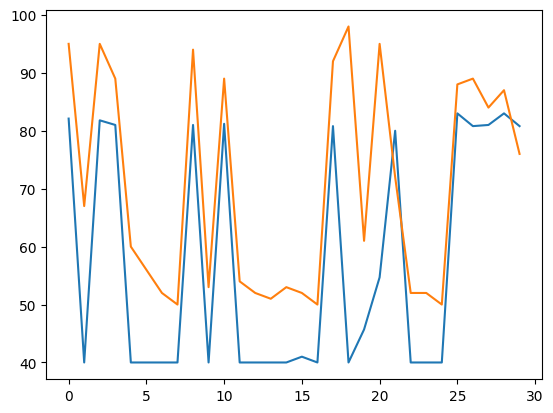

In [473]:
plt.plot(df[['FinalExamScore','AttendenceRate']])

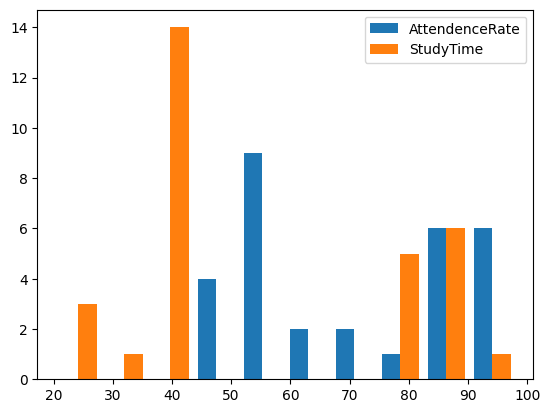

In [474]:
plt.hist(df[['AttendenceRate','StudyTime']])
plt.legend(['AttendenceRate', 'StudyTime'])

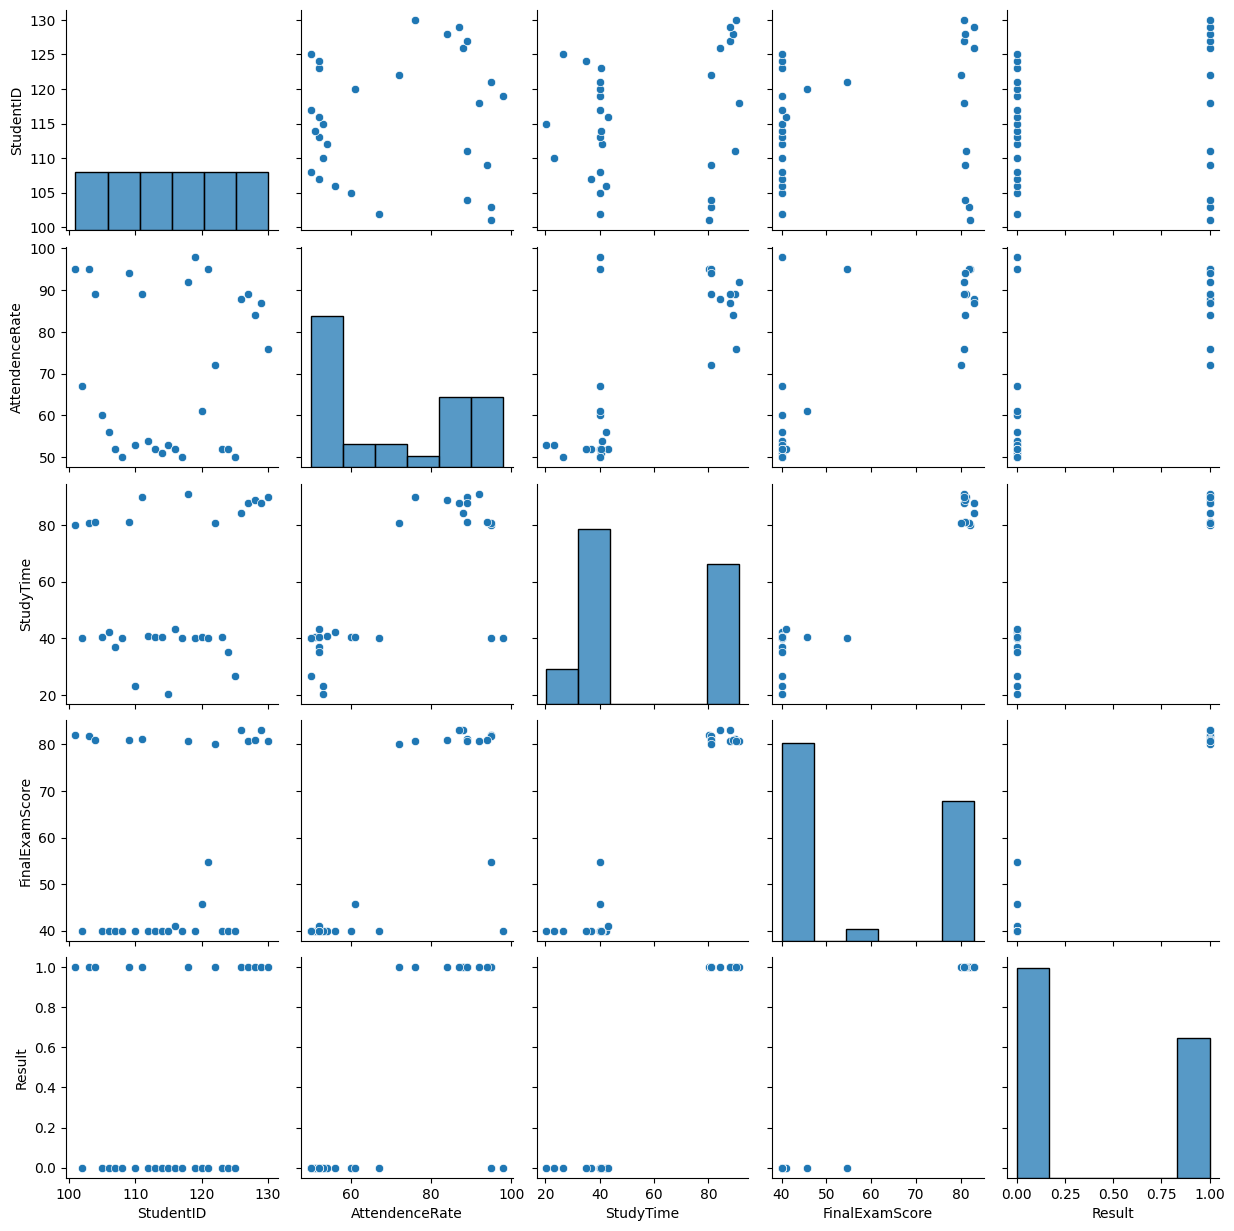

In [475]:
sns.pairplot(df)

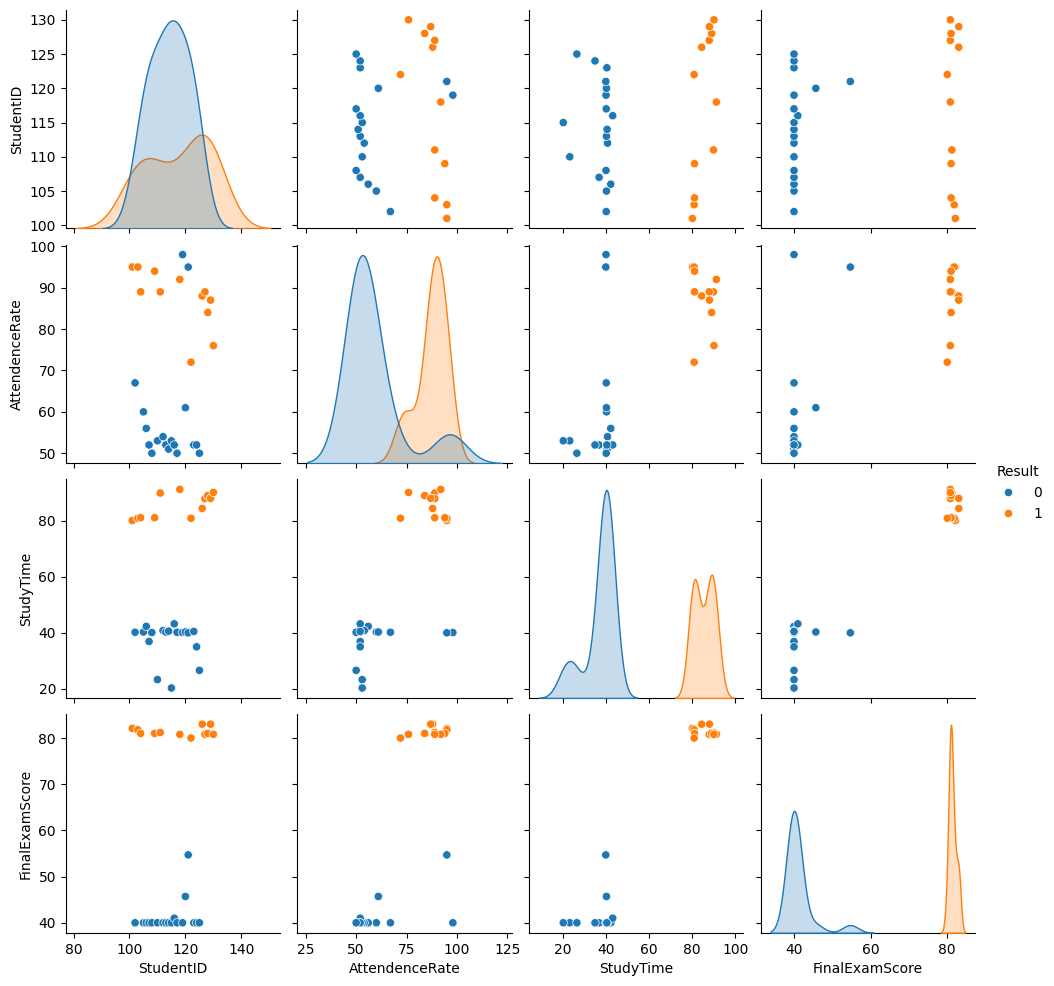

In [476]:
sns.pairplot(df,hue='Result')

## LR Model Train-Test Splitting

In [477]:
x=df[['StudyTime']]
y=df['FinalExamScore']

In [478]:
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [479]:
print(x.head())
print(y.head())

   StudyTime
0       80.1
1       40.2
2       80.9
3       81.1
4       40.3
0    82.1
1    40.0
2    81.8
3    81.0
4    40.0
Name: FinalExamScore, dtype: float64


In [480]:
from sklearn.model_selection import train_test_split

In [481]:
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [482]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(24, 1)
(6, 1)
(24,)
(6,)


### Linear Regression

* Model Calling
* Model Trainning
* Model Predict
* Evalution metrices

In [483]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [484]:
model_lr=LinearRegression()

In [485]:
model_lr.fit(train_x,train_y)

LinearRegression()

In [486]:
y_pred_train=model_lr.predict(train_x)
y_pred_test=model_lr.predict(test_x)

In [487]:
train_mse_lr=mean_squared_error(train_y,y_pred_train)
test_mse_lr=mean_squared_error(test_y,y_pred_test)
train_r2_lr=r2_score(train_y,y_pred_train)
test_r2_lr=r2_score(test_y,y_pred_test)

In [488]:
print('Train MSE:',train_mse_lr)
print('Test MSE:',test_mse_lr)
print('Train R2:',train_r2_lr)
print('Test R2:',test_r2_lr)

Train MSE: 25.843817809867883
Test MSE: 28.48859768080749
Train R2: 0.9333241972353223
Test R2: 0.9308873999953455


## LOR Model Spliting & Training

In [489]:
x1=df[['AttendenceRate','StudyTime']]
y1=df['Result']

In [490]:
from sklearn.model_selection import train_test_split

train_x1, test_x1, train_y1, test_y1=train_test_split(x1,y1,test_size=0.2,random_state=42)

print(train_x1.shape)
print(test_x1.shape)
print(train_y1.shape)
print(test_y1.shape)

(24, 2)
(6, 2)
(24,)
(6,)


### Logistic Regression

* Model Calling
* Model Trainning
* Model Predict
* Evalution metrices

In [491]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [492]:
model_lor=LogisticRegression(max_iter=1000)

In [493]:
model_lor.fit(train_x1,train_y1)

LogisticRegression(max_iter=1000)

In [494]:
y_pred_lor_train=model_lor.predict(train_x1)
y_pred_lor_test=model_lor.predict(test_x1)

In [495]:
# Training
train_accuracy_lor=accuracy_score(train_y1,y_pred_lor_train)
train_precision_lor=precision_score(train_y1,y_pred_lor_train)
train_recall_lor=recall_score(train_y1,y_pred_lor_train)
train_f1_lor=f1_score(train_y1,y_pred_lor_train)

print('Accuracy:',train_accuracy_lor)
print('Precision:',train_precision_lor)
print('Recall:',train_recall_lor)
print('F1 Score:',train_f1_lor)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [496]:
# Testing
test_accuracy_lor=accuracy_score(test_y1,y_pred_lor_test)
test_precision_lor=precision_score(test_y1,y_pred_lor_test)
test_recall_lor=recall_score(test_y1,y_pred_lor_test)
test_f1_lor=f1_score(test_y1,y_pred_lor_test)

print('Accuracy:',test_accuracy_lor)
print('Precision:',test_precision_lor)
print('Recall:',test_recall_lor)
print('F1 Score:',test_f1_lor)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [497]:
# Training Report
print(classification_report(train_y1, y_pred_lor_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [498]:
# Test Report
print(classification_report(test_y1, y_pred_lor_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## K-Means Clustering Algorithm

* Model calling
* Cluster selection
* Model training
* Evalution Matrix

In [499]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [500]:
k=3
model_KMeans = KMeans(n_clusters=k, random_state=42)

In [501]:
columns_for_clustering = ['AttendenceRate','StudyTime']
df_for_clustering = df[columns_for_clustering]

In [502]:
model_KMeans.fit(df_for_clustering)

KMeans(n_clusters=3, random_state=42)

In [503]:
cluster_labels = model_KMeans.labels_

cluster_centers = model_KMeans.cluster_centers_

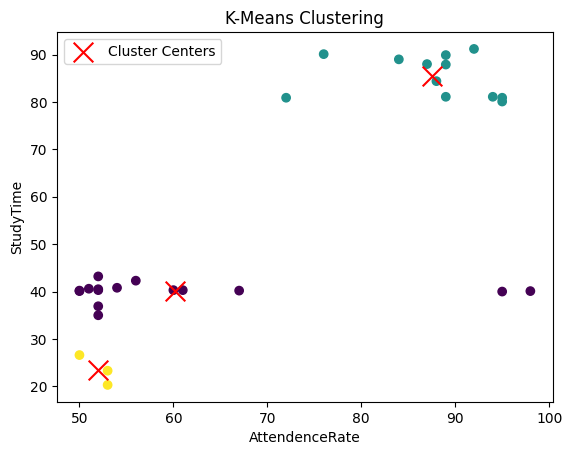

In [504]:
plt.scatter(df_for_clustering['AttendenceRate'], df_for_clustering['StudyTime'], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')
plt.xlabel('AttendenceRate')
plt.ylabel('StudyTime')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [505]:
silhouette=silhouette_score(df_for_clustering,cluster_labels)
davies_bouldin=davies_bouldin_score(df_for_clustering,cluster_labels)

print('Silhouette Score:',silhouette)
print('Davies Bouldin Index:',davies_bouldin)

Silhouette Score: 0.5531042443306569
Davies Bouldin Index: 0.6029077634988785
